In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from tensorflow.keras.models import load_model


import joblib
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv("/Users/mitpatel/Desktop/Everything/MY/DL/Projects/Customer_churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop(columns=['customerID'],inplace=True)

In [5]:
df.shape

(7043, 20)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df["TotalCharges"].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

In [9]:
df["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df[df["TotalCharges"].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
df=df.dropna()

In [13]:
df.shape

(7032, 20)

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
df[df["Churn"]=="No"].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [17]:
df[df["Churn"]=="No"].shape

(5163, 20)

In [18]:
tenure_churn_no=df[df["Churn"]=="No"].tenure
tenure_churn_yes=df[df["Churn"]=="Yes"].tenure

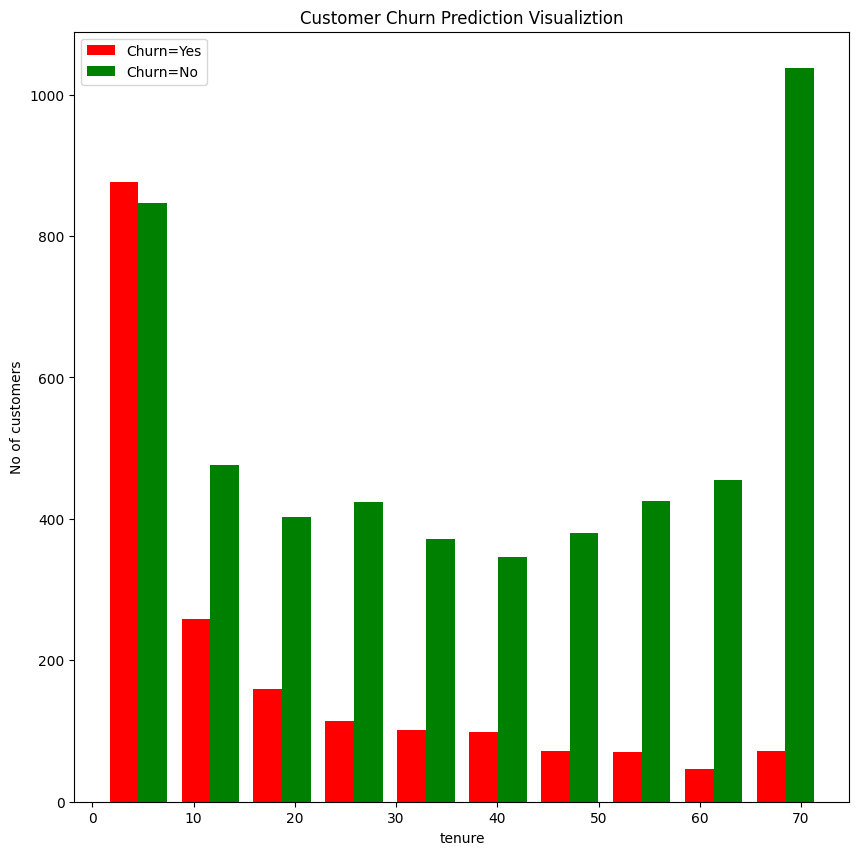

In [19]:
plt.figure(figsize=(10,10))
plt.title("Customer Churn Prediction Visualiztion")
plt.xlabel("tenure")
plt.ylabel("No of customers")
plt.hist([tenure_churn_yes,tenure_churn_no],color=["red",'green'])
plt.legend(['Churn=Yes','Churn=No'])
plt.show()

In [20]:
monthly_charge_churn_no=df[df["Churn"]=="No"].MonthlyCharges
monthly_charge_churn_yes=df[df["Churn"]=="Yes"].MonthlyCharges

In [21]:
def print_unq_col(df):
 for col in df:
  if df[col].dtypes=='object':
   print(f"{col} : {df[col].unique()}")

In [22]:
print_unq_col(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [23]:
df.replace("No internet service","No",inplace=True)
df.replace("No phone service","No",inplace=True)

In [24]:
print_unq_col(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [25]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
  df[col].replace({'Yes':1,'No':0},inplace=True)

In [26]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [27]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [28]:
df.gender.unique()

array([1, 0])

One hot encoding for categorical columns

In [29]:
df=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])

In [30]:
df.sample(8)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4835,0,0,1,0,65,1,1,1,0,1,...,False,True,False,True,False,False,False,False,True,False
3945,1,0,0,0,3,0,0,1,0,0,...,True,False,False,True,False,False,False,False,False,True
3652,1,1,0,0,1,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
3567,1,0,1,1,14,1,0,0,1,0,...,False,True,False,True,False,False,False,True,False,False
3650,0,1,0,0,71,1,1,0,0,0,...,False,False,True,False,False,True,False,False,False,True
2980,1,0,0,0,72,1,1,0,0,0,...,False,False,True,False,False,True,False,True,False,False
3035,1,1,1,0,25,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
6161,0,0,0,0,7,1,0,1,0,0,...,False,True,False,True,False,False,False,False,False,True


In [31]:
for col in df:
  if(df[col].dtypes=='bool'):
    df.replace({True:1,False:0},inplace=True)

In [32]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [33]:
df.sample(8)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4224,1,0,1,0,71,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3190,0,0,1,1,66,0,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0
42,1,0,1,1,17,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
6745,1,0,0,0,54,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2740,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
458,0,0,1,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2582,1,0,0,1,12,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
3332,0,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [35]:
df.shape

(7032, 27)

In [37]:
X=df.drop(columns=["Churn"],axis=1)
y=df["Churn"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2, stratify=y)

In [39]:
print(X_train.shape,X_test.shape)

(5625, 26) (1407, 26)


In [40]:
cols_to_scaled = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = MinMaxScaler()
scaler.fit(X_train[cols_to_scaled])
joblib.dump(scaler, "scaler.save")

X_train[cols_to_scaled] = scaler.transform(X_train[cols_to_scaled])
X_test[cols_to_scaled] = scaler.transform(X_test[cols_to_scaled])


In [49]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)


In [46]:
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/Users/mitpatel/miniforge3/envs/py310-ml-gpu/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7513 - loss: 0.5070 - val_accuracy: 0.7846 - val_loss: 0.4229
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7801 - loss: 0.4632 - val_accuracy: 0.7875 - val_loss: 0.4146
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7751 - loss: 0.4589 - val_accuracy: 0.7925 - val_loss: 0.4105
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7881 - loss: 0.4454 - val_accuracy: 0.7960 - val_loss: 0.4094
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7868 - loss: 0.4471 - val_accuracy: 0.7960 - val_loss: 0.4094
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7874 - loss: 0.4461 - val_accuracy: 0.7918 - val_loss: 0.4095
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7888 - loss: 0.4398 - val_accuracy: 0.7910 - val_loss: 0.4092
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7892 - loss: 0.4397 - 

In [57]:
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
y_pred = []
for prob in y_pred_prob:
    if prob[0] >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy: 0.7917555081734187


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.55      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



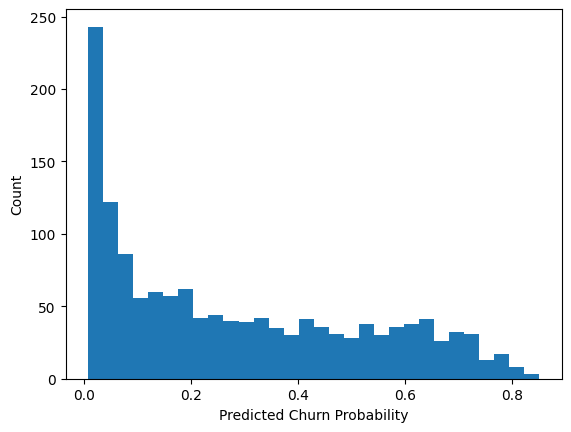

In [58]:
print(classification_report(y_test, y_pred))

plt.hist(y_pred_prob, bins=30)
plt.xlabel("Predicted Churn Probability")
plt.ylabel("Count")
plt.show()

In [59]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7918 - loss: 0.4104


[0.4103778898715973, 0.7917554974555969]

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.55      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

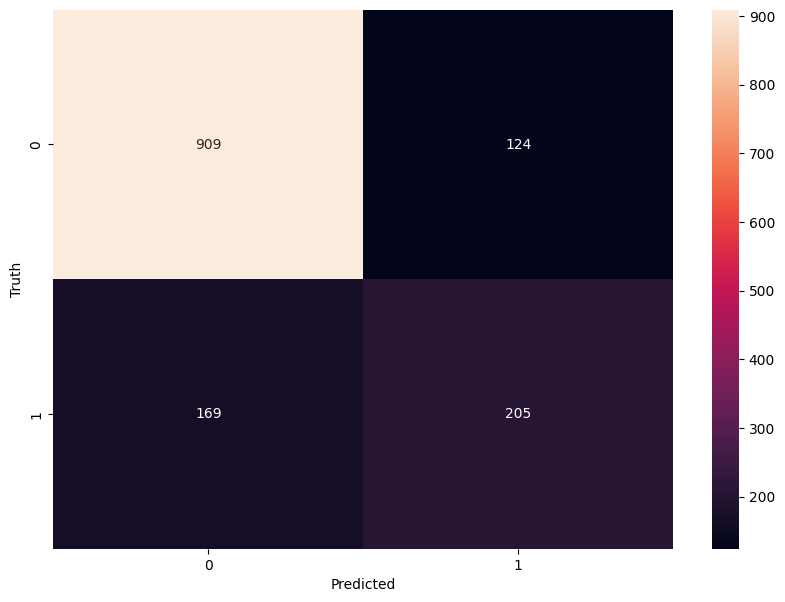

In [61]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
round((917+181)/(917+181+227+82),2)

0.78

In [62]:
model.save('customer_churn_model.h5')

In [63]:
from tensorflow.keras.models import load_model
model = load_model('customer_churn_model.h5')


In [53]:
import joblib
from tensorflow.keras.models import load_model

# Load Model and Scaler
model = load_model('customer_churn_model.h5')
scaler = joblib.load('scaler.save')

# List all required columns (use same expected order as your processed df)
expected_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
    'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Bank transfer automatic', 'PaymentMethod_Credit card automatic',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]

def preprocess_input(user_input):
    df = pd.DataFrame([user_input])
    # All dummy, encoding logic as above!
    # ... (repeat all feature engineering steps as used in main code) ...
    # For categorical columns, use get_dummies and fill missing columns
    cat_cols = ['InternetService', 'Contract', 'PaymentMethod']
    df = pd.get_dummies(df, columns=cat_cols)
    for col in expected_cols:
        if col not in df.columns:
            df[col] = 0
    df = df[expected_cols]
    # Scaling based on train scaler
    cols_to_scaled = ["tenure", "MonthlyCharges", "TotalCharges"]
    df[cols_to_scaled] = scaler.transform(df[cols_to_scaled])
    return df

def predict_churn(user_input):
    X = preprocess_input(user_input)
    prob = float(model.predict(X)[0][0])
    label = 'Churn' if prob >= 0.5 else 'No Churn'
    print(f"Prediction: {label}")
    print(f"Churn Probability: {prob:.2f}")
    return label, prob

# EXAMPLE: Predict for a test customer
user_input = {
    'gender': 1,  # Female
    'SeniorCitizen': 0,
    'Partner': 1,
    'Dependents': 0,
    'tenure': 18,
    'PhoneService': 1,
    'MultipleLines': 1,
    'OnlineSecurity': 0,
    'OnlineBackup': 0,
    'DeviceProtection': 1,
    'TechSupport': 0,
    'StreamingTV': 1,
    'StreamingMovies': 0,
    'PaperlessBilling': 1,
    'MonthlyCharges': 94.48,
    'TotalCharges': 857.25,
    'InternetService': 'Fiber optic',
    'Contract': 'Month-to-month',
    'PaymentMethod': 'Electronic check'
}

predict_churn(user_input)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'customer_churn_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)